In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.decomposition import PCA

Load Data

In [11]:
train_data = pd.read_csv('Churn Prdiction Data/churn-bigml-80.csv')
test_data = pd.read_csv('Churn Prdiction Data/churn-bigml-20.csv')

Encode Categorical Data

In [12]:
label_enc = LabelEncoder()
for col in ['International plan', 'Voice mail plan']:
    train_data[col] = label_enc.fit_transform(train_data[col])
    test_data[col] = label_enc.transform(test_data[col])

In [13]:
train_data['Churn'] = train_data['Churn'].astype(int)
test_data['Churn'] = test_data['Churn'].astype(int)

train_data.drop(columns=['State'], inplace=True)
test_data.drop(columns=['State'], inplace=True)
X_train = train_data.drop(columns=['Churn'])
y_train = train_data['Churn']
X_test = test_data.drop(columns=['Churn'])
y_test = test_data['Churn']

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [25]:
svm_linear = SVC(kernel='linear', probability=True,class_weight='balanced')
svm_linear.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='linear', probability=True)

In [26]:
svm_rbf = SVC(kernel='rbf', probability=True,class_weight='balanced')
svm_rbf.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True)

In [27]:

y_pred_linear = svm_linear.predict(X_test)
y_prob_linear = svm_linear.predict_proba(X_test)[:, 1]


In [28]:
y_pred_rbf = svm_rbf.predict(X_test)
y_prob_rbf = svm_rbf.predict_proba(X_test)[:, 1]

In [29]:
# Evaluate the models
def evaluate_model(y_true, y_pred, y_prob, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)

    print(f'\n{model_name} Model Evaluation:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')

    # Confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()



SVM Linear Model Evaluation:
Accuracy: 0.7661
Precision: 0.3541
Recall: 0.7789
ROC AUC: 0.8316


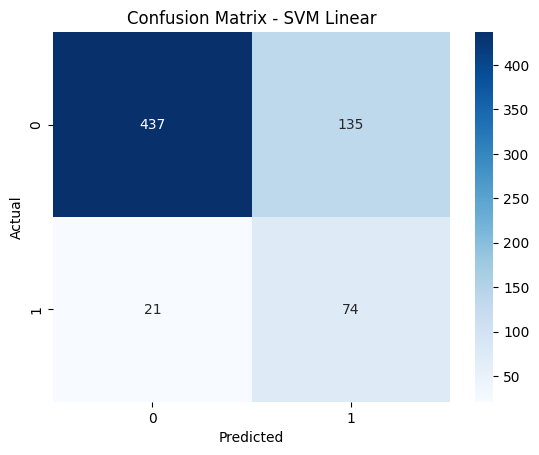

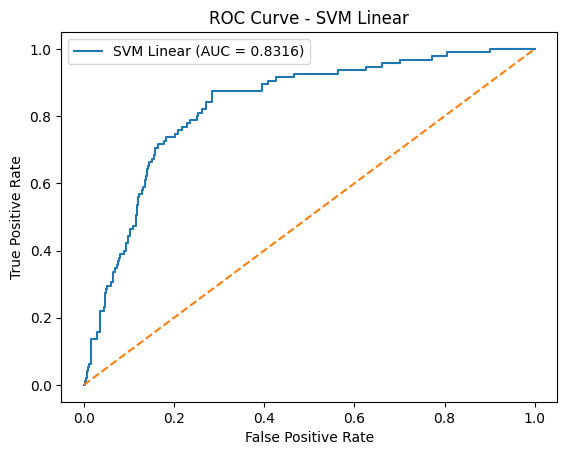


SVM RBF Model Evaluation:
Accuracy: 0.8936
Precision: 0.5938
Recall: 0.8000
ROC AUC: 0.9306


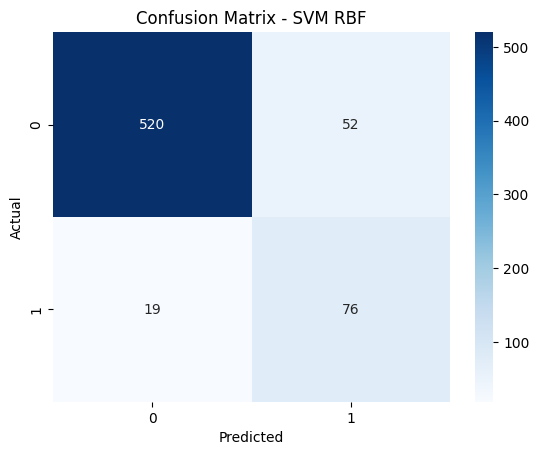

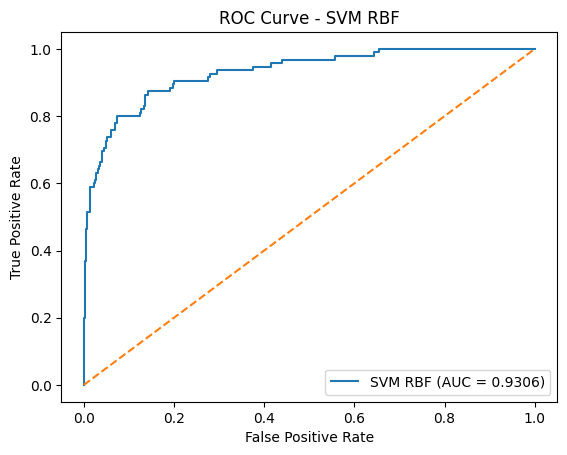

In [30]:
evaluate_model(y_test, y_pred_linear, y_prob_linear, 'SVM Linear')
evaluate_model(y_test, y_pred_rbf, y_prob_rbf, 'SVM RBF')
